In [65]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
from tensorflow.keras.preprocessing import image

In [66]:
# Step 1: Paths
base_dir = "C:/Users/sande/Desktop/Autism_project/New/dataset"
excel_path = base_dir + "/patient details.xlsx"

In [67]:
# Step 2: Parameters
img_height, img_width = 224, 224
batch_size = 32

In [68]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
# Step 3: Load Metadata
df = pd.read_excel(excel_path)
print("Sample Patient Details:\n", df.head())


Sample Patient Details:
    S.No Patient Id Joint Pain:  Gender   Age Menopause Age  height  (meter)  \
0   1.0        OP1         yes    male  65.0           NaN          1.64592   
1   2.0        OP2         yes  female  54.0            46          1.67640   
2   3.0        OP3         yes  female  49.0            43          1.37160   
3   4.0        OP4         yes  female  57.0            40          1.52400   
4   5.0        OP5         yes  female  40.0           NaN          1.49352   

   Weight (KG)  Smoker Alcoholic  ... Family History of Osteoporosis  \
0          65.0    yes        no  ...                             no   
1          78.0     no        no  ...                             no   
2          59.0     no        no  ...                             no   
3          72.0     no        no  ...                             no   
4          54.0     no        no  ...                             no   

  Maximum Walking distance (km)  Daily Eating habits Medical Histor


📂 Folder structure and image counts:
normal: 36 images


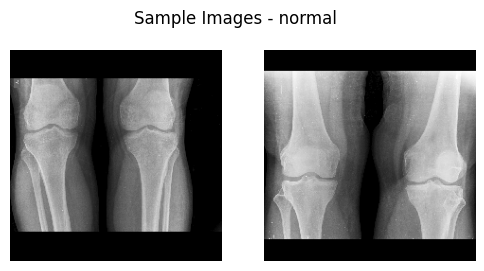

osteopenia: 154 images


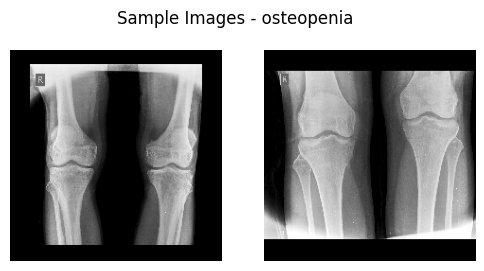

osteoporosis: 49 images


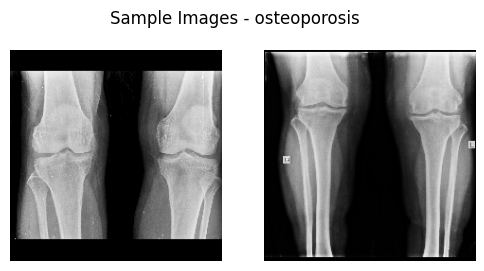

In [70]:
# Step 4: Show Class Info and Sample Images
print("\n📂 Folder structure and image counts:")
for class_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, class_name)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"{class_name}: {len(image_files)} images")

        # Show 2 sample images per class
        if len(image_files) >= 2:
            fig, axes = plt.subplots(1, 2, figsize=(6, 3))
            fig.suptitle(f"Sample Images - {class_name}")
            for i in range(2):
                img_path = os.path.join(folder_path, image_files[i])
                img = image.load_img(img_path, target_size=(img_height, img_width))
                axes[i].imshow(img)
                axes[i].axis('off')
            plt.show()

In [71]:
# Step 6: ImageDataGenerator for Training & Validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

print("\n✅ Classes Detected:", train_gen.class_indices)

Found 193 images belonging to 3 classes.


Found 46 images belonging to 3 classes.

✅ Classes Detected: {'normal': 0, 'osteopenia': 1, 'osteoporosis': 2}


In [72]:

# Step 7: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\sande\Desktop\Autism_project\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#step 8: Train the Model
history = model.fit(train_gen, validation_data=val_gen, epochs=50)



c:\Users\sande\Desktop\Autism_project\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5155 - loss: 5.3504 - val_accuracy: 0.1522 - val_loss: 1.4832
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4487 - loss: 1.0911 - val_accuracy: 0.6304 - val_loss: 1.0927
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6546 - loss: 0.9366 - val_accuracy: 0.6087 - val_loss: 1.2136
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6774 - loss: 0.8070 - val_accuracy: 0.6304 - val_loss: 1.3663
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6904 - loss: 0.7228 - val_accuracy: 0.6304 - val_loss: 1.2539
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7607 - loss: 0.5853 - val_accuracy: 0.5000 - val_loss: 1.3479
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8204 - loss: 0.5413 - val_accuracy: 0.5217 - val_loss: 1.6412
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8624 - loss: 0.4131 - val_accuracy: 0.4348 - val_loss: 1.5652
Epoch 9/50
7/7 ━

In [74]:
# Step 9: Save the Model
model.save("osteoporosis_model.h5")
print("✅ Model saved as 'osteoporosis_model.h5'")


✅ Model saved as 'osteoporosis_model.h5'


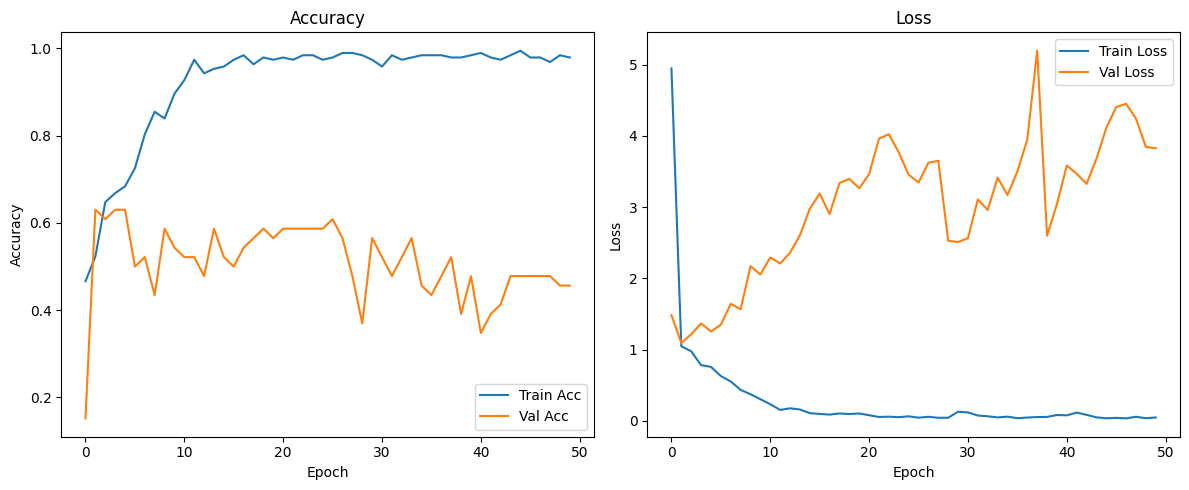

In [76]:
# Step 11: Accuracy & Loss Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 🔁 Get ground truth labels and predicted labels
val_gen.reset()  # Reset generator

# Predict probabilities
pred_probs = model.predict(val_gen, verbose=1)
predicted_classes = np.argmax(pred_probs, axis=1)
true_classes = val_gen.classes

# Class labels
class_labels = list(val_gen.class_indices.keys())

# 🧾 Classification Report
print("📊 Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# 🔁 Optional: Confusion Matrix
print("\n🧩 Confusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step
📊 Classification Report:

              precision    recall  f1-score   support

      normal       0.00      0.00      0.00         7
  osteopenia       0.72      0.87      0.79        30
osteoporosis       0.50      0.33      0.40         9

    accuracy                           0.63        46
   macro avg       0.41      0.40      0.40        46
weighted avg       0.57      0.63      0.59        46


🧩 Confusion Matrix:
[[ 0  5  2]
 [ 3 26  1]
 [ 1  5  3]]


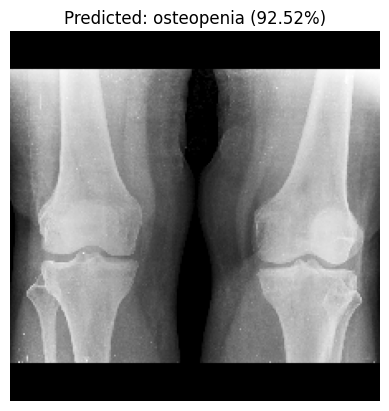

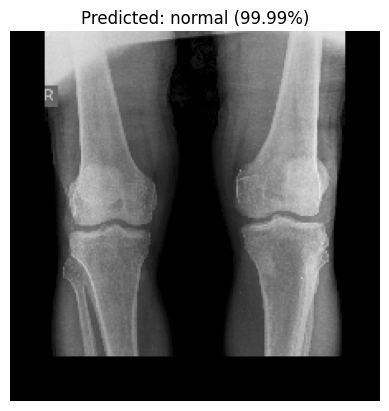

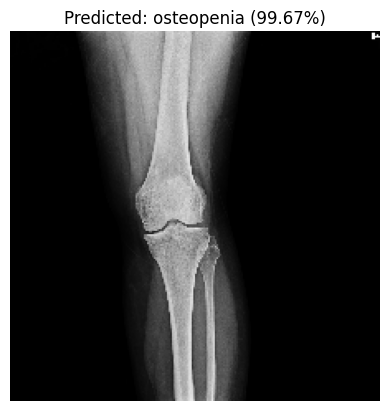

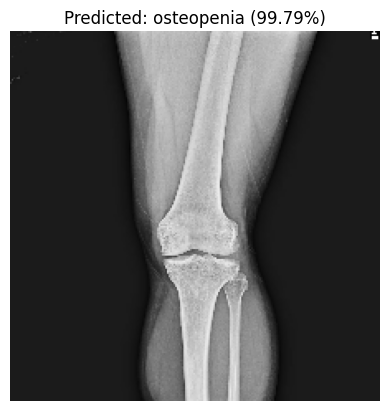

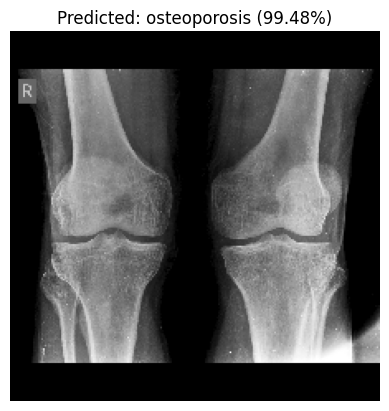

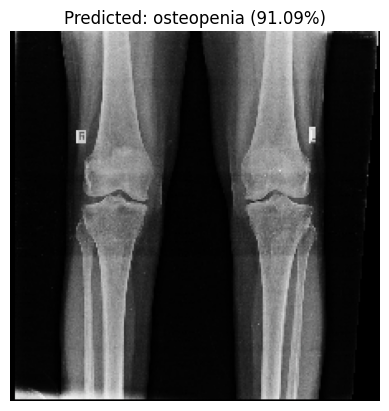

In [80]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 📍 Dataset directory
base_dir = "C:/Users/sande/Desktop/Autism_project/New/dataset"

def predict_top_class_only(base_dir, model, class_indices, img_height=224, img_width=224, samples_per_class=2):
    class_labels = {v: k for k, v in class_indices.items()}

    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        image_files = glob.glob(os.path.join(class_path, "*.jpg")) + \
                      glob.glob(os.path.join(class_path, "*.jpeg")) + \
                      glob.glob(os.path.join(class_path, "*.png"))

        if len(image_files) == 0:
            continue

        random_samples = random.sample(image_files, min(samples_per_class, len(image_files)))

        for img_path in random_samples:
            try:
                img = image.load_img(img_path, target_size=(img_height, img_width))
                img_array = image.img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                pred_probs = model.predict(img_array, verbose=0)[0]
                top_index = np.argmax(pred_probs)
                top_label = class_labels[top_index]
                confidence = pred_probs[top_index] * 100

                # 🖼️ Display the image with only the top prediction
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Predicted: {top_label} ({confidence:.2f}%)")
                plt.show()

            except Exception as e:
                print("❌ Error with image:", img_path, "|", e)

# 🔁 Run the prediction
predict_top_class_only(base_dir, model, train_gen.class_indices, img_height, img_width, samples_per_class=2)


EfficientB0

In [45]:
# ✅ Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [46]:
# ✅ Step 2: Dataset Paths and Parameters
base_dir = "C:/Users/sande/Desktop/Autism_project/New/dataset"
img_height, img_width = 224, 224
batch_size = 32

In [48]:
# ✅ Step 3: Data Augmentation and Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)
print("\n✅ Classes Detected:", train_gen.class_indices)

Found 193 images belonging to 3 classes.
Found 46 images belonging to 3 classes.

✅ Classes Detected: {'normal': 0, 'osteopenia': 1, 'osteoporosis': 2}


In [49]:
# ✅ Step 4: Load EfficientNetB0 as Base Model
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False  # Freeze base layers

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [50]:
# ✅ Step 5: Add Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [62]:
# ✅ Step 6: Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# ✅ Step 7: Updated Callbacks
callbacks = [
    EarlyStopping(
        patience=40, 
        restore_best_weights=True, 
        monitor='val_loss',
        verbose=1
    ),
    ReduceLROnPlateau(
        patience=3, 
        factor=0.3, 
        monitor='val_loss', 
        verbose=1
    )
]


In [63]:
# ✅ Step 8: Train the Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6276 - loss: 0.9255 - val_accuracy: 0.6522 - val_loss: 0.8850 - learning_rate: 1.0000e-04
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6498 - loss: 0.9464 - val_accuracy: 0.6522 - val_loss: 0.8849 - learning_rate: 1.0000e-04
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5326 - loss: 1.0560 - val_accuracy: 0.6522 - val_loss: 0.8848 - learning_rate: 1.0000e-04
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6441 - loss: 0.8976 - val_accuracy: 0.6522 - val_loss: 0.8853 - learning_rate: 1.0000e-04
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6324 - loss: 0.9019 - val_accuracy: 0.6522 - val_loss: 0.8855 - learning_rate: 1.0000e-04
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 853ms/step - accuracy: 0.6685 - loss: 0.8992
Epoch 6: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6653 - loss: 0.9041 - val_accurac

In [53]:
# Step 10: Evaluate
loss, acc = model.evaluate(val_gen)
print(f"\n📈 Final Validation Accuracy: {acc*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - accuracy: 0.6952 - loss: 0.8436

📈 Final Validation Accuracy: 65.22%


In [ ]:
# Step 9: Save the Model
model.save("osteoporosis_model.h5")
print("✅ Model saved as 'osteoporosis_model.h5'")

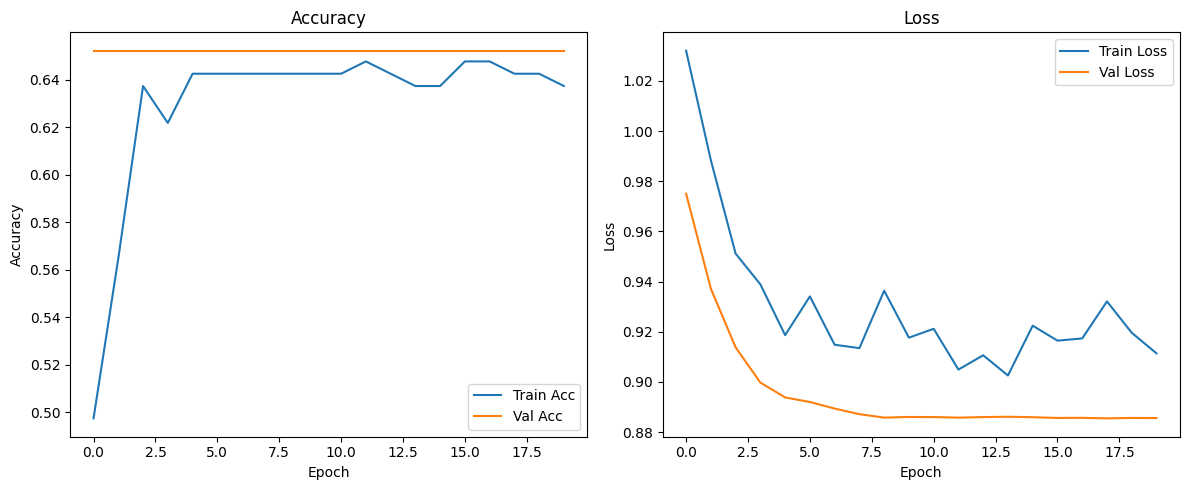

In [54]:
# Step 11: Accuracy & Loss Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 🔁 Get ground truth labels and predicted labels
val_gen.reset()  # Reset generator

# Predict probabilities
pred_probs = model.predict(val_gen, verbose=1)
predicted_classes = np.argmax(pred_probs, axis=1)
true_classes = val_gen.classes

# Class labels
class_labels = list(val_gen.class_indices.keys())

# 🧾 Classification Report
print("📊 Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# 🔁 Optional: Confusion Matrix
print("\n🧩 Confusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
📊 Classification Report:

              precision    recall  f1-score   support

      normal       0.00      0.00      0.00         7
  osteopenia       0.65      1.00      0.79        30
osteoporosis       0.00      0.00      0.00         9

    accuracy                           0.65        46
   macro avg       0.22      0.33      0.26        46
weighted avg       0.43      0.65      0.51        46


🧩 Confusion Matrix:
[[ 0  7  0]
 [ 0 30  0]
 [ 0  9  0]]


c:\Users\sande\Desktop\Autism_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sande\Desktop\Autism_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sande\Desktop\Autism_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le


📁 Actual Class: normal - Showing 2 predictions
🔍 Predicting: C:/Users/sande/Desktop/Autism_project/New/dataset\normal\N14.jpg


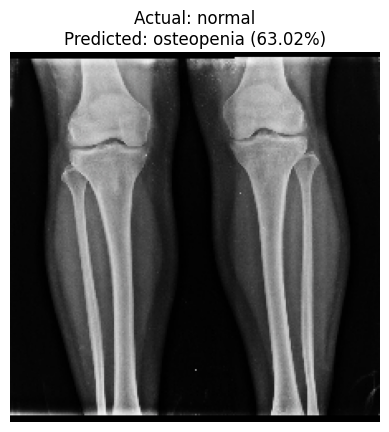

🔍 Predicting: C:/Users/sande/Desktop/Autism_project/New/dataset\normal\N8.JPEG


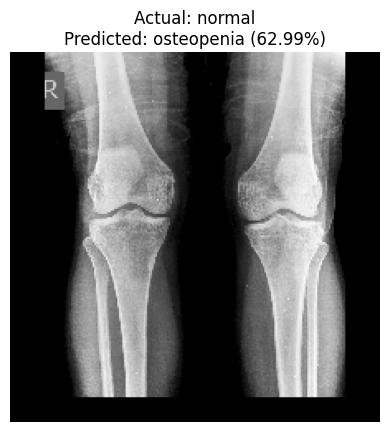


📁 Actual Class: osteopenia - Showing 2 predictions
🔍 Predicting: C:/Users/sande/Desktop/Autism_project/New/dataset\osteopenia\OP105.jpg


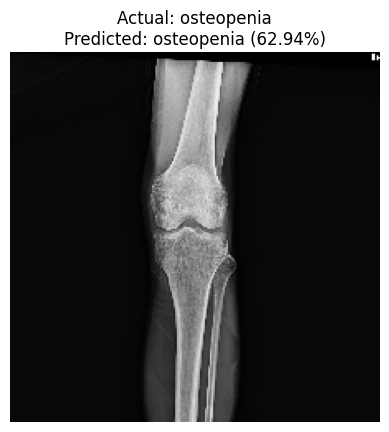

🔍 Predicting: C:/Users/sande/Desktop/Autism_project/New/dataset\osteopenia\OP31.JPEG


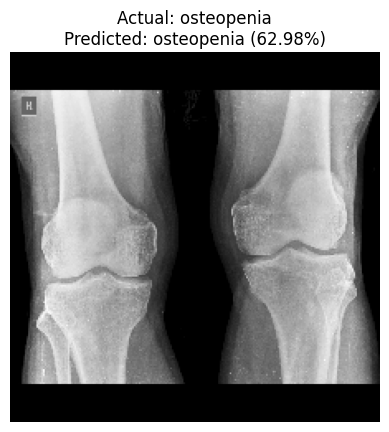


📁 Actual Class: osteoporosis - Showing 2 predictions
🔍 Predicting: C:/Users/sande/Desktop/Autism_project/New/dataset\osteoporosis\OS6.JPEG


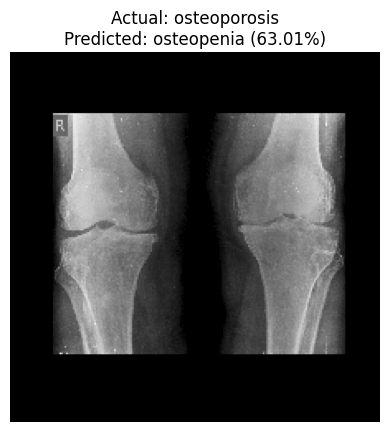

🔍 Predicting: C:/Users/sande/Desktop/Autism_project/New/dataset\osteoporosis\OS46.jpg


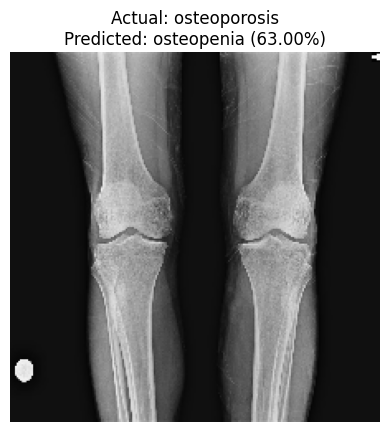

In [56]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 📍 Set this correctly
base_dir = "C:/Users/sande/Desktop/Autism_project/New/dataset"

def predict_random_samples(base_dir, model, class_indices, img_height=224, img_width=224, samples_per_class=2):
    class_labels = {v: k for k, v in class_indices.items()}
    
    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        image_files = glob.glob(os.path.join(class_path, "*.jpg")) + \
                      glob.glob(os.path.join(class_path, "*.jpeg")) + \
                      glob.glob(os.path.join(class_path, "*.png"))

        if len(image_files) == 0:
            print(f"⚠️ No images found in {class_name}")
            continue

        print(f"\n📁 Actual Class: {class_name} - Showing {samples_per_class} predictions")

        random_samples = random.sample(image_files, min(samples_per_class, len(image_files)))

        for img_path in random_samples:
            try:
                print("🔍 Predicting:", img_path)  # debug line

                img = image.load_img(img_path, target_size=(img_height, img_width))
                img_array = image.img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                pred_probs = model.predict(img_array, verbose=0)[0]
                pred_class_index = np.argmax(pred_probs)
                confidence = np.max(pred_probs) * 100
                predicted_label = class_labels[pred_class_index]

                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Actual: {class_name}\nPredicted: {predicted_label} ({confidence:.2f}%)")
                plt.show()

            except Exception as e:
                print("❌ Error with image:", img_path, "|", e)

# 🔁 Call it here
predict_random_samples(base_dir, model, train_gen.class_indices, img_height, img_width, samples_per_class=2)
